In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
in_directory = "./../hsi_airborne/"

data = np.load(in_directory + "data.npy")

In [3]:
# calculat the mean of each band
mean_bands = np.nanmean(data, axis=(2, 3))

In [4]:
#tranform this in a dataframe
import pandas as pd
df = pd.DataFrame(mean_bands)
df.columns = [f'band_{i}' for i in range(df.shape[1])]

In [5]:

train_gt_path = os.path.join( './../train_gt.csv')
train_gt = pd.read_csv(train_gt_path)

train_gt

,sample_index,B,Cu,Zn,Fe,S,Mn
0,0,0.8,2.1,5.0,186.6,12.078640,110.7
1,1,0.6,3.5,7.3,255.6,12.199673,75.7
2,2,0.5,2.1,2.3,204.0,65.882013,87.1
3,3,0.8,1.9,3.3,165.6,31.942712,56.0
4,4,0.5,2.4,5.8,419.9,35.970698,65.1
...,...,...,...,...,...,...,...
1871,1871,0.6,2.6,2.6,225.4,31.778477,99.9
1872,1872,0.5,2.4,3.0,204.2,30.832575,94.2
1873,1873,0.6,2.6,6.1,298.9,10.246492,64.3
1874,1874,0.8,1.8,6.0,184.6,10.098610,125.3


In [6]:
# concat df and train_gt by columns
df = pd.concat([df, train_gt], axis=1)

In [7]:
df.head()

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_427,band_428,band_429,sample_index,B,Cu,Zn,Fe,S,Mn
0,-0.113545,-0.125723,-0.129144,-0.135493,-0.138750,-0.144521,-0.143518,-0.143887,-0.151588,-0.158418,...,0.036191,0.035329,0.009138,0,0.8,2.1,5.0,186.6,12.078640,110.7
1,-1.392806,-1.389968,-1.402303,-1.414040,-1.441239,-1.476968,-1.492758,-1.498696,-1.488208,-1.473216,...,-1.660172,-1.652066,-1.656826,1,0.6,3.5,7.3,255.6,12.199673,75.7
2,-0.048968,-0.066697,-0.084471,-0.096470,-0.088406,-0.050361,0.005484,0.061140,0.099186,0.112053,...,0.121573,0.108197,0.126638,2,0.5,2.1,2.3,204.0,65.882013,87.1
3,0.137026,0.143191,0.149087,0.159795,0.163316,0.160396,0.145867,0.130400,0.118332,0.114112,...,0.038750,0.052154,0.037243,3,0.8,1.9,3.3,165.6,31.942712,56.0
4,-1.345370,-1.346879,-1.357390,-1.368360,-1.385370,-1.410123,-1.422668,-1.425259,-1.422681,-1.410833,...,-1.300438,-1.291574,-1.267881,4,0.5,2.4,5.8,419.9,35.970698,65.1


Processing element: B-----------------------------------


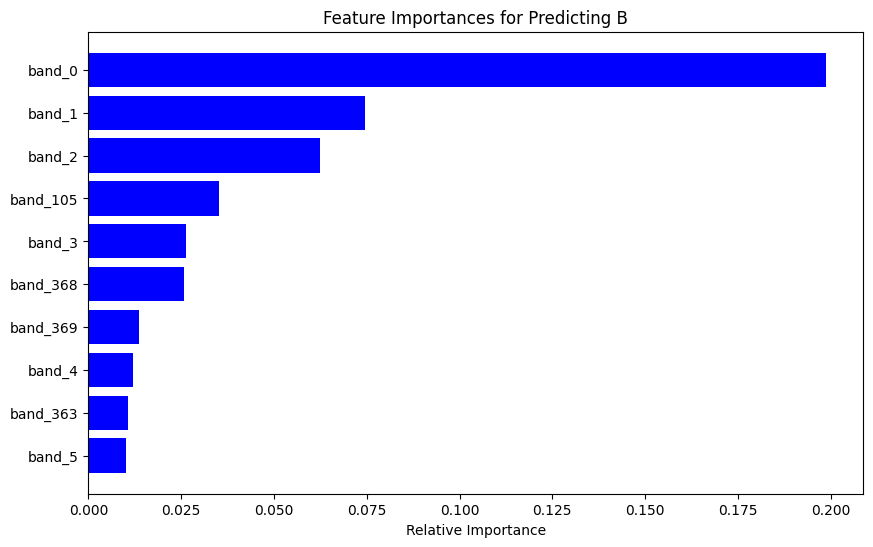

Mean Squared Error: 0.0029975181236673795
R^2 Score: 0.9455114821708481--------------------------------------------

Processing element: Cu-----------------------------------


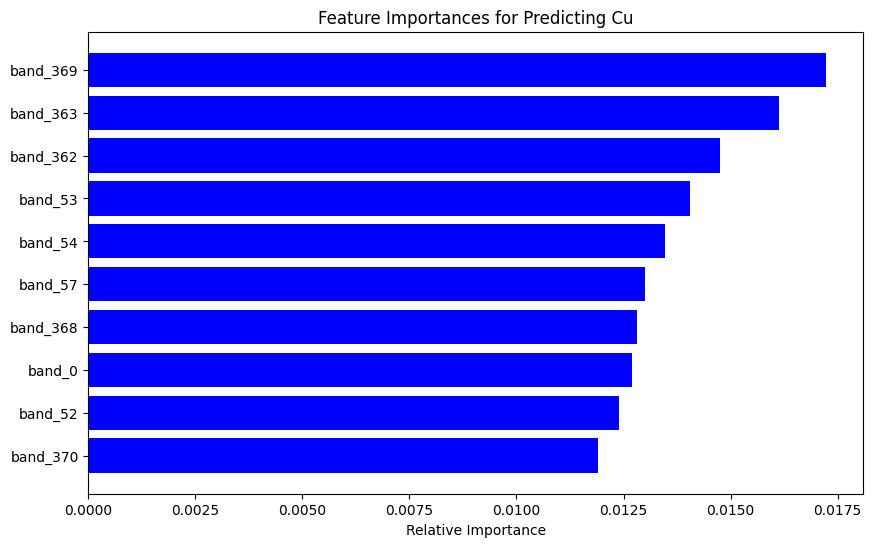

Mean Squared Error: 0.01874837046908314
R^2 Score: 0.9091605140593628--------------------------------------------

Processing element: Fe-----------------------------------


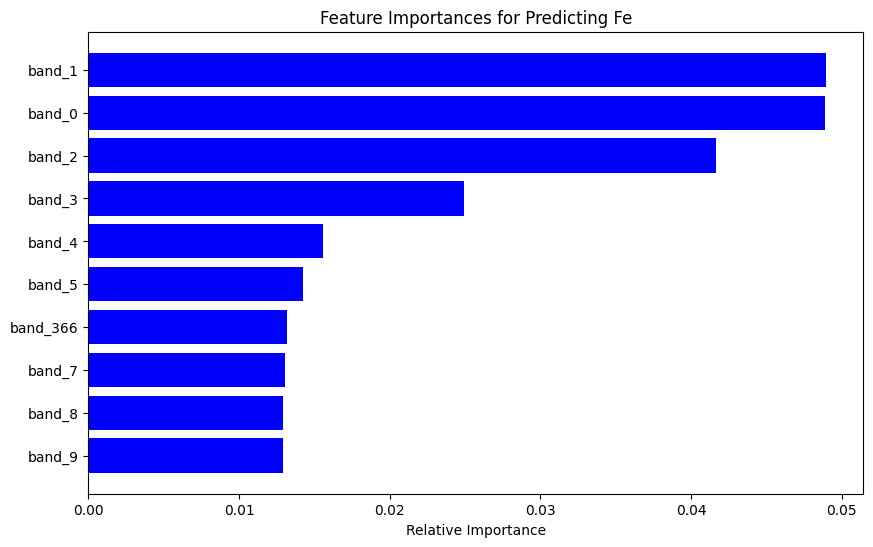

Mean Squared Error: 234.04796423081038
R^2 Score: 0.9334061337576011--------------------------------------------

Processing element: Mn-----------------------------------


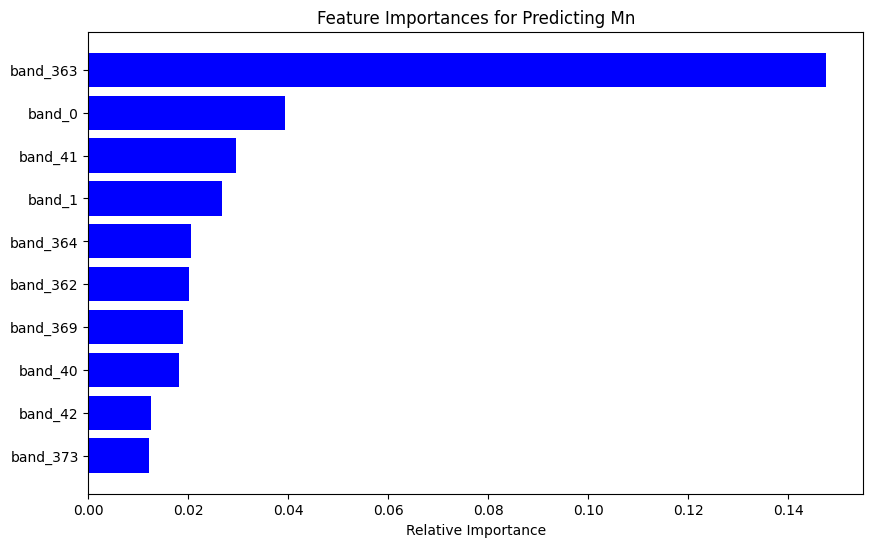

Mean Squared Error: 33.5612845021322
R^2 Score: 0.9287865190221689--------------------------------------------

Processing element: S-----------------------------------


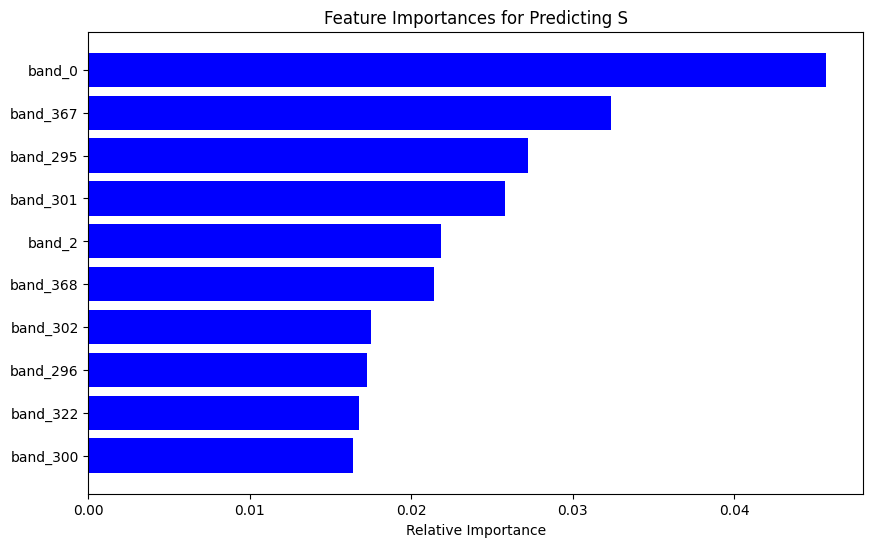

Mean Squared Error: 13.903201341413988
R^2 Score: 0.9164896059297375--------------------------------------------

Processing element: Zn-----------------------------------


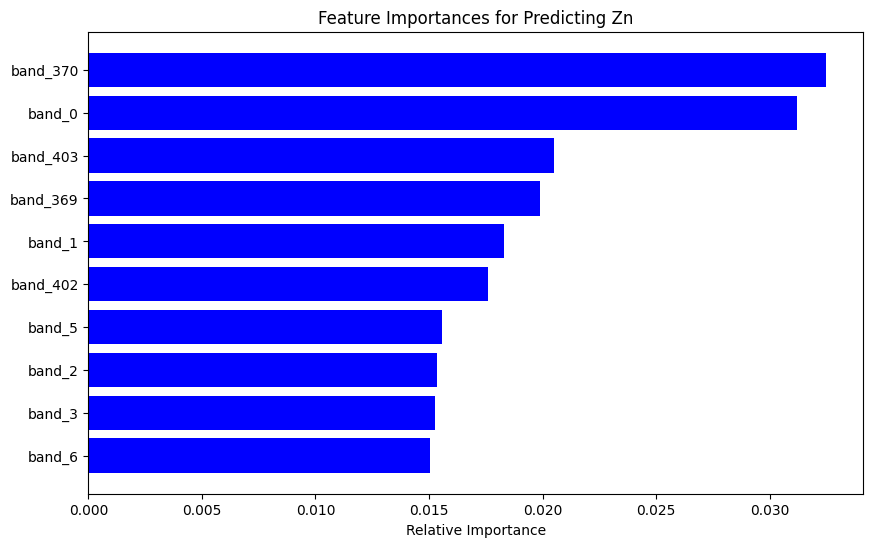

Mean Squared Error: 0.28493420362473343
R^2 Score: 0.9309595562840614--------------------------------------------



In [19]:
elementos = ['B', 'Cu', 'Fe', 'Mn', 'S', 'Zn']

dados_por_elemento = {}

for elemento in elementos:

    print(f'Processing element: {elemento}-----------------------------------')
    # create a random forest regressor to estimate "B" column
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(df.iloc[:, :430], df[elemento])

    # get the 10 feature importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[-10:]


    # get top 10 feature importance name
    top_features = df.columns[indices].tolist()
    dados_por_elemento[elemento] = {
        'importances': importances[indices],
        'features': top_features
    }

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for Predicting {elemento}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [f'band_{i}' for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

    # print the mean squared erros
    y_pred = rf.predict(df.iloc[:, :430])
    mse = mean_squared_error(df[elemento], y_pred)
    print(f'Mean Squared Error: {mse}')
    r2_score = rf.score(df.iloc[:, :430], df[elemento])
    print(f'R^2 Score: {r2_score}--------------------------------------------\n')


    dados_por_elemento[elemento]['mse'] = float(mse)
    dados_por_elemento[elemento]['r2_score'] = float(r2_score)
    

In [31]:
# get band numbers from feature names

for elemento in elementos:
    features = dados_por_elemento[elemento]['features']
    band_numbers = [int(f.split('_')[1]) for f in features]
    dados_por_elemento[elemento]['band_numbers'] = band_numbers

In [32]:
for elemento in elementos:
    dados_por_elemento[elemento]['importances'] = dados_por_elemento[elemento]['importances'].tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [33]:
for elemento in elementos:
    dados_por_elemento[elemento]['band_numbers'] = sorted(dados_por_elemento[elemento]['band_numbers'])

In [34]:
# save as json file
import json
with open('rf_feature_importance.json', 'w') as f:
    json.dump(dados_por_elemento, f, indent=4)
